In [1]:
import pandas as pd

In [10]:
filepath='/home/student11/Documents/Dashboard/donnees-hospitalieres-covid19-2021-02-18-19h03.csv'
df_covid=pd.read_csv(filepath,sep=";")


In [11]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102414 entries, 0 to 102413
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   dep     102414 non-null  object
 1   sexe    102414 non-null  int64 
 2   jour    102414 non-null  object
 3   hosp    102414 non-null  int64 
 4   rea     102414 non-null  int64 
 5   rad     102414 non-null  int64 
 6   dc      102414 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 5.5+ MB


In [15]:
df_covid.dep.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', '971', '972',
       '973', '974', '976'], dtype=object)

<AxesSubplot:xlabel='jour'>

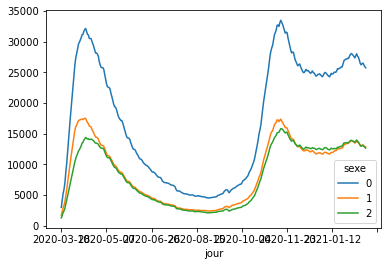

In [38]:
df_covid.groupby(['jour','sexe'])['hosp'].sum().unstack().plot()


In [39]:
df_1=df_covid.groupby(['jour','sexe'])['hosp'].sum().unstack()

In [50]:
df_1.reset_index(inplace=True)
df_1.rename(columns={0:'Total', 1:'Hommes', 2:'Femmes'})

sexe,jour,Total,Hommes,Femmes
0,2020-03-18,2972,1685,1248
1,2020-03-19,4073,2256,1632
2,2020-03-20,5226,2912,2134
3,2020-03-21,5900,3298,2401
4,2020-03-22,6954,3906,2815
...,...,...,...,...
333,2021-02-14,26401,13114,13012
334,2021-02-15,26478,13154,13053
335,2021-02-16,26195,12982,12928
336,2021-02-17,25929,12862,12781


In [52]:
df_covid

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6
...,...,...,...,...,...,...,...
102409,974,1,2021-02-18,57,25,413,30
102410,974,2,2021-02-18,42,13,432,29
102411,976,0,2021-02-18,127,27,819,74
102412,976,1,2021-02-18,61,18,381,46


In [64]:
df2 = df_covid.query("sexe==0")
df2[['hosp','rea','rad','dc']].groupby(df_covid['jour']).sum()

,hosp,rea,rad,dc
jour,,,,
2020-03-18,2972,771,816,218
2020-03-19,4073,1002,1180,327
2020-03-20,5226,1297,1587,450
2020-03-21,5900,1453,1811,525
2020-03-22,6954,1674,2117,632
...,...,...,...,...
2021-02-14,26401,3299,241597,57789
2021-02-15,26478,3371,242497,58201
2021-02-16,26195,3338,244207,58552


In [65]:
df_h = df_covid.query("sexe==1")
df_h[['hosp','rea','rad','dc']].groupby(df_covid['jour']).sum()

,hosp,rea,rad,dc
jour,,,,
2020-03-18,1685,525,432,121
2020-03-19,2256,689,580,179
2020-03-20,2912,905,777,250
2020-03-21,3298,1018,881,297
2020-03-22,3906,1176,1031,356
...,...,...,...,...
2021-02-14,13114,2282,121468,33326
2021-02-15,13154,2327,121895,33565
2021-02-16,12982,2296,122742,33769


In [66]:
df_f= df_covid.query("sexe==2")
df_f[['hosp','rea','rad','dc']].groupby(df_covid['jour']).sum()

,hosp,rea,rad,dc
jour,,,,
2020-03-18,1248,239,379,96
2020-03-19,1632,284,562,136
2020-03-20,2134,362,764,190
2020-03-21,2401,401,888,219
2020-03-22,2815,461,1040,263
...,...,...,...,...
2021-02-14,13012,991,118470,24112
2021-02-15,13053,1016,118933,24278
2021-02-16,12928,1016,119782,24423


In [82]:
df3 = df_covid.query("sexe==0")
df3[['hosp','rea','rad','dc','dep']].groupby(['dep']).sum()

,hosp,rea,rad,dc
dep,,,,
01,50403,3953,244513,59505
02,55975,5959,422409,111752
03,32384,2996,146774,40121
04,18199,954,81939,13342
05,22047,2095,87464,17619
...,...,...,...,...
971,18206,3000,113519,25210
972,8961,2530,58892,8052
973,15184,2573,391300,14022


In [87]:
df3.loc[df3['jour']=='2021-02-18']


,dep,sexe,jour,hosp,rea,rad,dc
102111,01,0,2021-02-18,209,19,2050,499
102114,02,0,2021-02-18,253,26,2716,751
102117,03,0,2021-02-18,195,14,1478,461
102120,04,0,2021-02-18,168,6,730,178
102123,05,0,2021-02-18,138,6,783,195
...,...,...,...,...,...,...,...
102399,971,0,2021-02-18,31,5,826,175
102402,972,0,2021-02-18,11,3,399,45
102405,973,0,2021-02-18,32,7,2191,78
102408,974,0,2021-02-18,100,38,846,59
